In [12]:
# Filter and display only the anomaly points
anomalies = pca_df[pca_df["Anomaly"] == 1]
print("Anomalous PCA Values:")
print(anomalies.describe())

Anomalous PCA Values:
               PC1          PC2          PC3  Anomaly      Cluster
count  2094.000000  2094.000000  2094.000000   2094.0  2094.000000
mean     -1.999096     4.124842     1.712939      1.0     1.106017
std       2.415314     1.133523     0.602505      0.0     0.307933
min      -5.321730     0.042564    -0.771242      1.0     1.000000
25%      -3.654061     3.593641     1.321568      1.0     1.000000
50%      -2.560453     4.380017     1.673440      1.0     1.000000
75%      -1.275799     4.933507     2.149895      1.0     1.000000
max       5.512742     6.066595     4.443498      1.0     2.000000


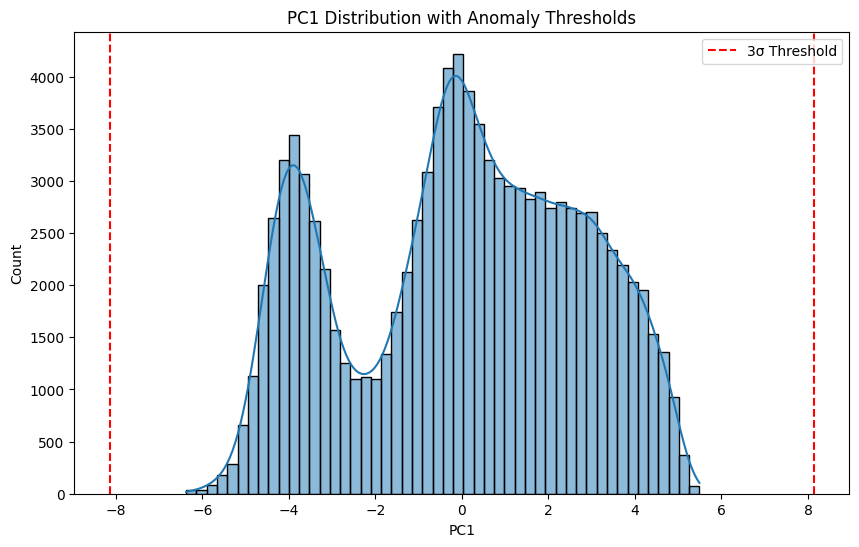

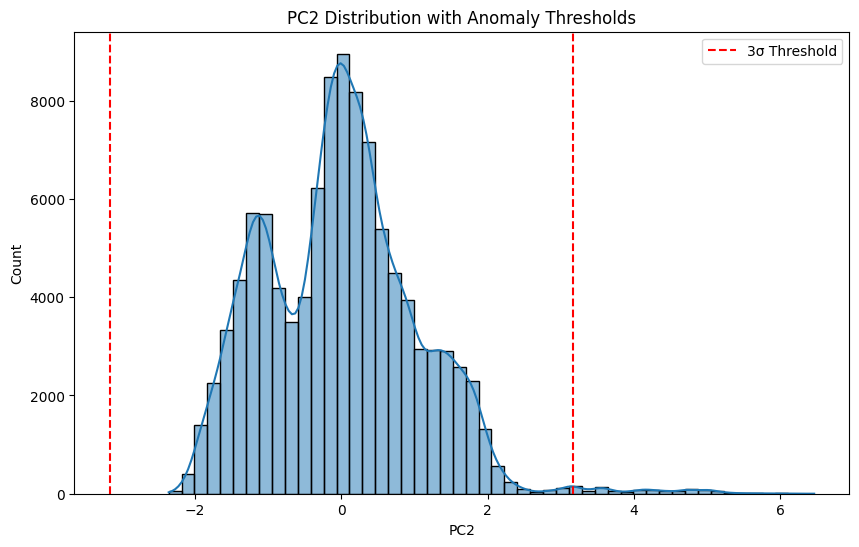

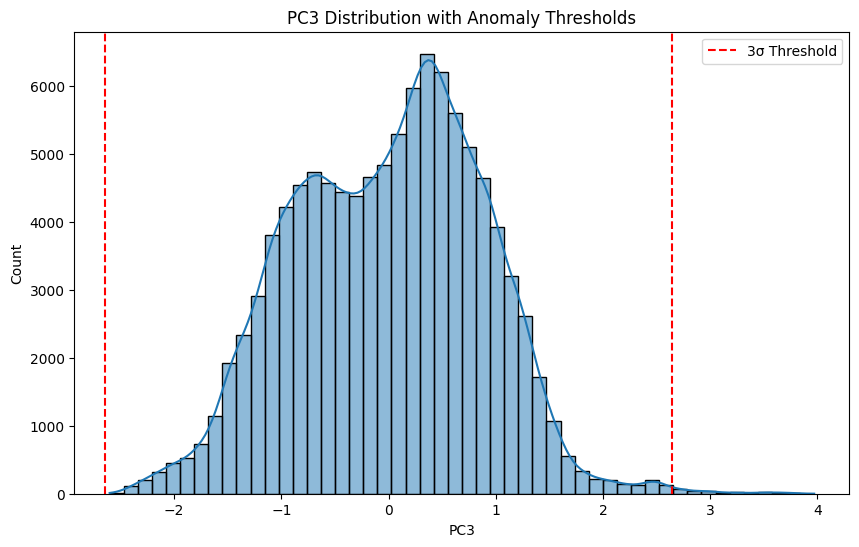

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot PC1 distribution
plt.figure(figsize=(10,6))
sns.histplot(pca_df["PC1"], bins=50, kde=True)
plt.axvline(pca_df["PC1"].mean() + 3*pca_df["PC1"].std(), color='r', linestyle='dashed', label="3σ Threshold")
plt.axvline(pca_df["PC1"].mean() - 3*pca_df["PC1"].std(), color='r', linestyle='dashed')
plt.legend()
plt.title("PC1 Distribution with Anomaly Thresholds")
plt.show()

# Repeat for PC2
plt.figure(figsize=(10,6))
sns.histplot(pca_df["PC2"], bins=50, kde=True)
plt.axvline(pca_df["PC2"].mean() + 3*pca_df["PC2"].std(), color='r', linestyle='dashed', label="3σ Threshold")
plt.axvline(pca_df["PC2"].mean() - 3*pca_df["PC2"].std(), color='r', linestyle='dashed')
plt.legend()
plt.title("PC2 Distribution with Anomaly Thresholds")
plt.show()

# Repeat for PC3
plt.figure(figsize=(10,6))
sns.histplot(pca_df["PC3"], bins=50, kde=True)
plt.axvline(pca_df["PC3"].mean() + 3*pca_df["PC3"].std(), color='r', linestyle='dashed', label="3σ Threshold")
plt.axvline(pca_df["PC3"].mean() - 3*pca_df["PC3"].std(), color='r', linestyle='dashed')
plt.legend()
plt.title("PC3 Distribution with Anomaly Thresholds")
plt.show()


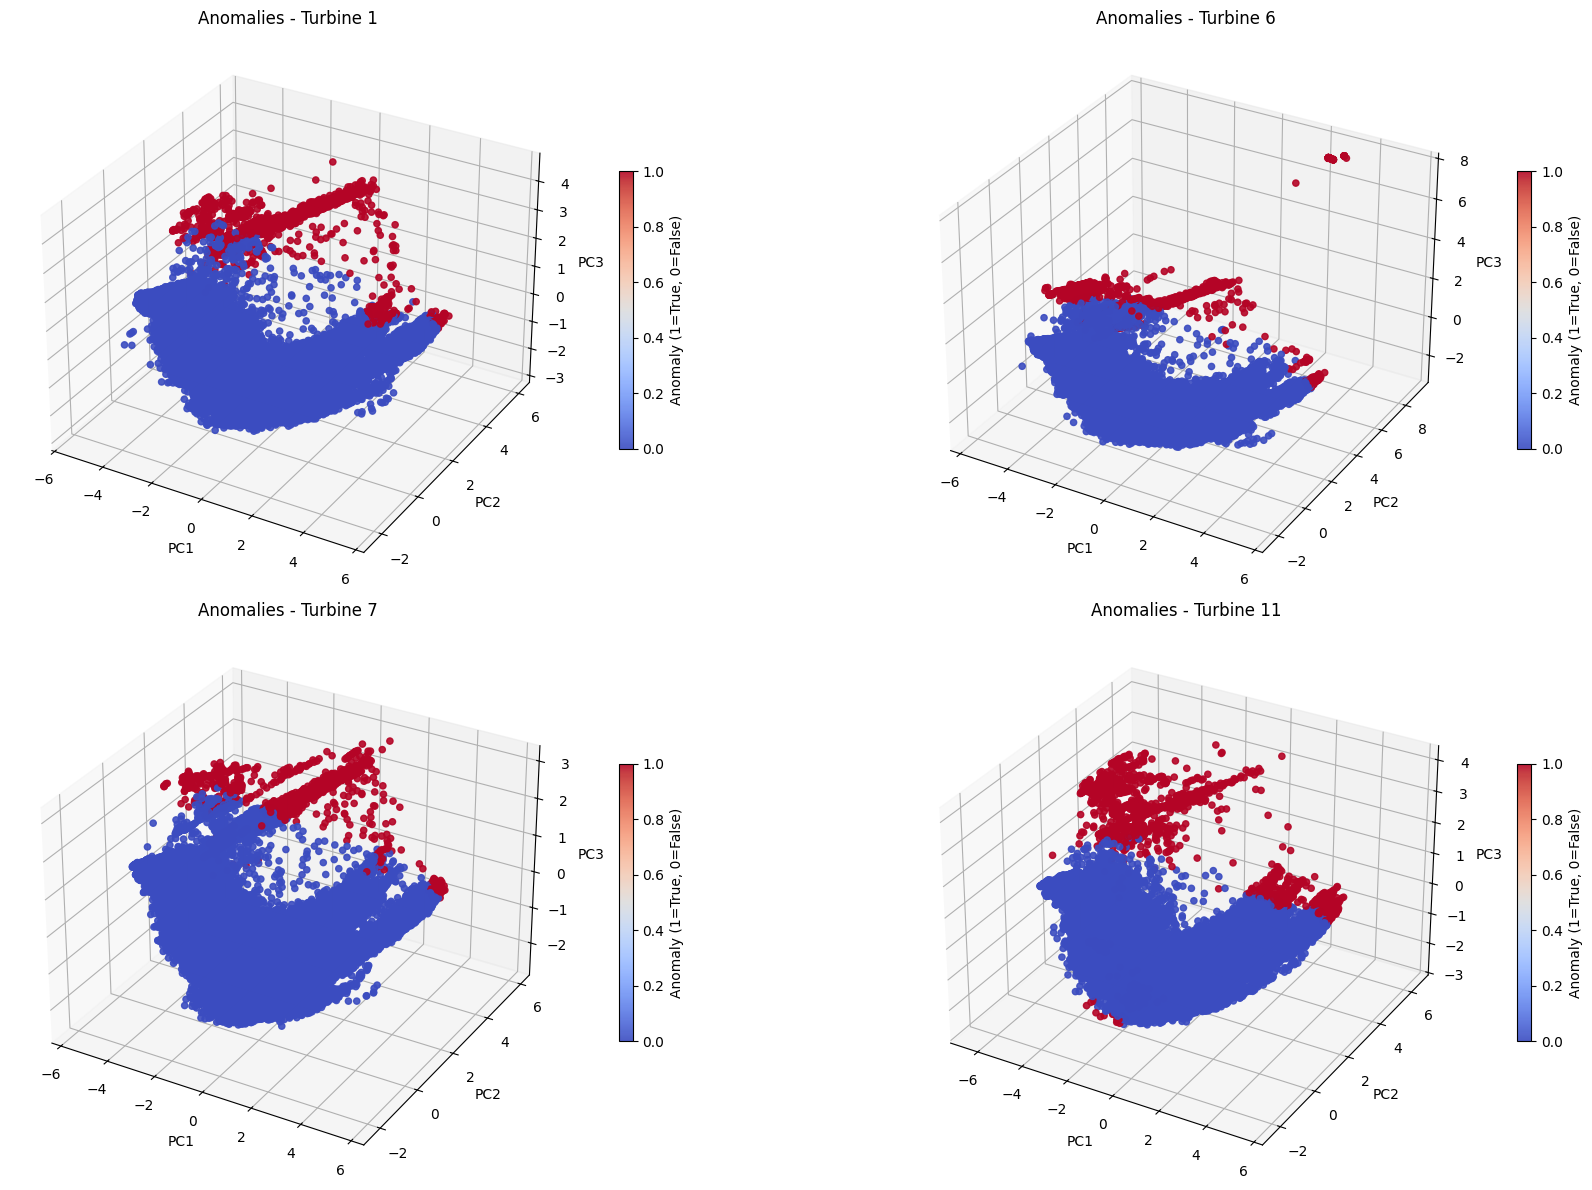

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Define file paths for the 4 turbine datasets
file_paths = [
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T01)_TimeSequence.csv",  # Replace with actual file paths
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T06)_TimeSequence.csv",
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T07)_TimeSequence.csv",
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T11)_TimeSequence.csv"
]

# Define selected columns for PCA analysis
selected_columns = [
    'Gen_RPM_Avg', 'Gen_Bear_Temp_Avg', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Avg',
    'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_TotReactPwr', 'Gear_Bear_Temp_Avg',
    'Gen_Bear2_Temp_Avg', 'Nac_Direction_Avg', 'Blds_PitchAngle_Avg'
]

# Set up 3D subplots (2x2 layout)
fig = plt.figure(figsize=(20, 12))
titles = ["Turbine 1", "Turbine 6", "Turbine 7", "Turbine 11"]

# Loop through each file and process separately
for i, file_path in enumerate(file_paths):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')  # 2x2 subplot grid
    
    # Load turbine dataset
    df = pd.read_csv(file_path)

    # Keep only selected columns and ensure they exist
    df_selected = df[[col for col in selected_columns if col in df.columns]].select_dtypes(include=['number'])
    
    # Handle missing values (fill with column mean)
    df_selected = df_selected.fillna(df_selected.mean())

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_selected)

    # Apply PCA (Reduce to 3 components)
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(scaled_data)

    # Convert PCA result into a DataFrame
    pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"], index=df.index)

    # Apply Isolation Forest for Anomaly Detection
    iso_forest = IsolationForest(contamination=0.02, random_state=42)
    pca_df["Anomaly"] = iso_forest.fit_predict(pca_df)
    
    # Convert -1 (anomalous) to 1 for easier interpretation
    pca_df["Anomaly"] = pca_df["Anomaly"].apply(lambda x: 1 if x == -1 else 0)

    # 3D Scatter Plot for Anomalies
    scatter = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], 
                         c=pca_df["Anomaly"], cmap="coolwarm", alpha=0.9)

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(f"Anomalies - {titles[i]}")

    # Add color legend
    legend1 = plt.colorbar(scatter, ax=ax, shrink=0.5)
    legend1.set_label("Anomaly (1=True, 0=False)")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [3]:
# Print summary statistics for PCA-transformed data
print(pca_df.describe())


                 PC1           PC2           PC3        Anomaly
count  104798.000000  1.047980e+05  1.047980e+05  104798.000000
mean        0.000000  3.037493e-17  3.905348e-17       0.020000
std         2.714243  1.055180e+00  8.807002e-01       0.140002
min        -6.373026 -2.358462e+00 -2.602376e+00       0.000000
25%        -2.177153 -8.231182e-01 -6.785682e-01       0.000000
50%         0.139214 -1.112846e-02  6.717602e-02       0.000000
75%         2.169184  6.180471e-01  6.416216e-01       0.000000
max         5.488978  6.463951e+00  3.971502e+00       1.000000


In [4]:
# Filter and display only the anomaly points
anomalies = pca_df[pca_df["Anomaly"] == 1]
print("Anomalous PCA Values:")
print(anomalies.describe())


Anomalous PCA Values:
               PC1          PC2          PC3  Anomaly
count  2096.000000  2096.000000  2096.000000   2096.0
mean     -1.197895     2.948139     1.538284      1.0
std       4.519910     1.332154     1.243580      0.0
min      -6.373026    -1.160869    -2.521728      1.0
25%      -5.073767     2.141523     1.191903      1.0
50%      -3.662441     3.050581     1.638101      1.0
75%       4.556604     4.029185     2.423628      1.0
max       5.488978     6.463951     3.971502      1.0


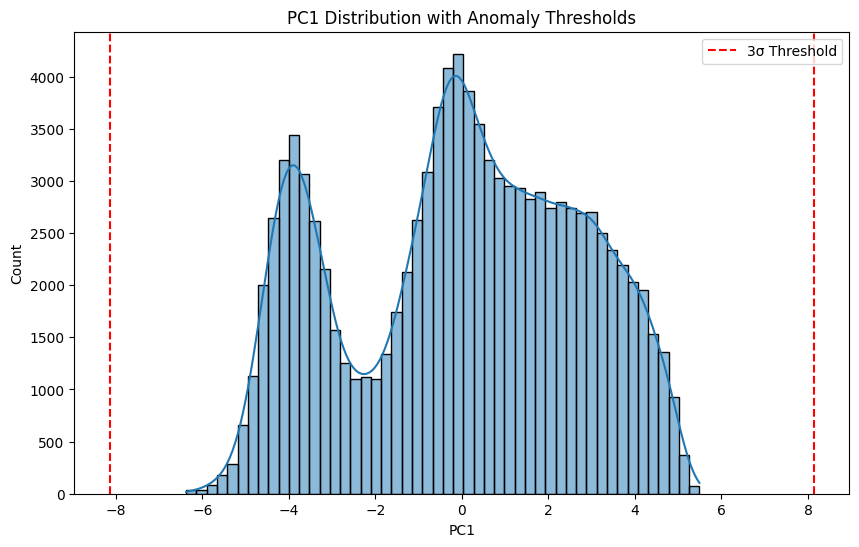

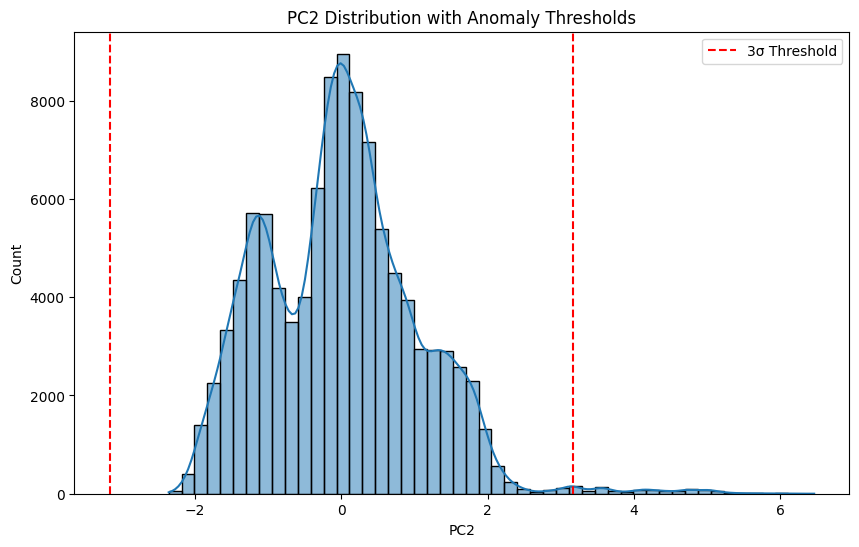

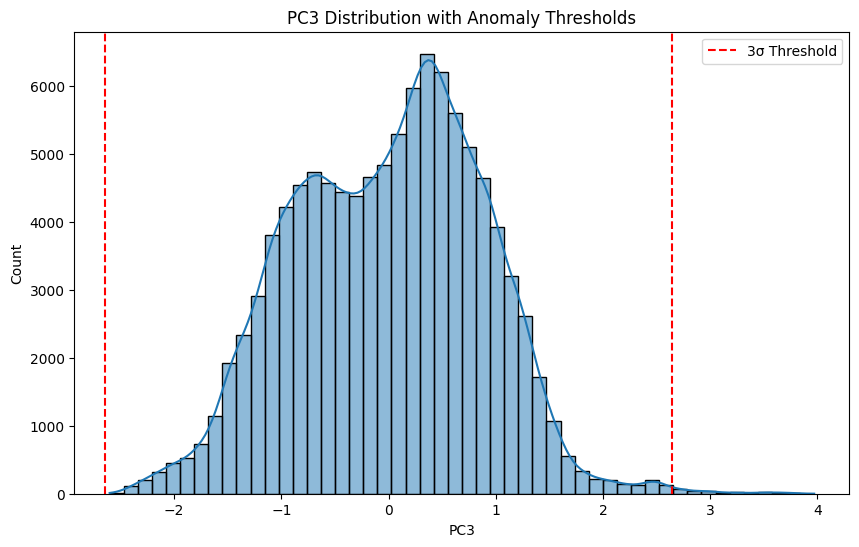

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot PC1 distribution
plt.figure(figsize=(10,6))
sns.histplot(pca_df["PC1"], bins=50, kde=True)
plt.axvline(pca_df["PC1"].mean() + 3*pca_df["PC1"].std(), color='r', linestyle='dashed', label="3σ Threshold")
plt.axvline(pca_df["PC1"].mean() - 3*pca_df["PC1"].std(), color='r', linestyle='dashed')
plt.legend()
plt.title("PC1 Distribution with Anomaly Thresholds")
plt.show()

# Repeat for PC2
plt.figure(figsize=(10,6))
sns.histplot(pca_df["PC2"], bins=50, kde=True)
plt.axvline(pca_df["PC2"].mean() + 3*pca_df["PC2"].std(), color='r', linestyle='dashed', label="3σ Threshold")
plt.axvline(pca_df["PC2"].mean() - 3*pca_df["PC2"].std(), color='r', linestyle='dashed')
plt.legend()
plt.title("PC2 Distribution with Anomaly Thresholds")
plt.show()

# Repeat for PC3
plt.figure(figsize=(10,6))
sns.histplot(pca_df["PC3"], bins=50, kde=True)
plt.axvline(pca_df["PC3"].mean() + 3*pca_df["PC3"].std(), color='r', linestyle='dashed', label="3σ Threshold")
plt.axvline(pca_df["PC3"].mean() - 3*pca_df["PC3"].std(), color='r', linestyle='dashed')
plt.legend()
plt.title("PC3 Distribution with Anomaly Thresholds")
plt.show()


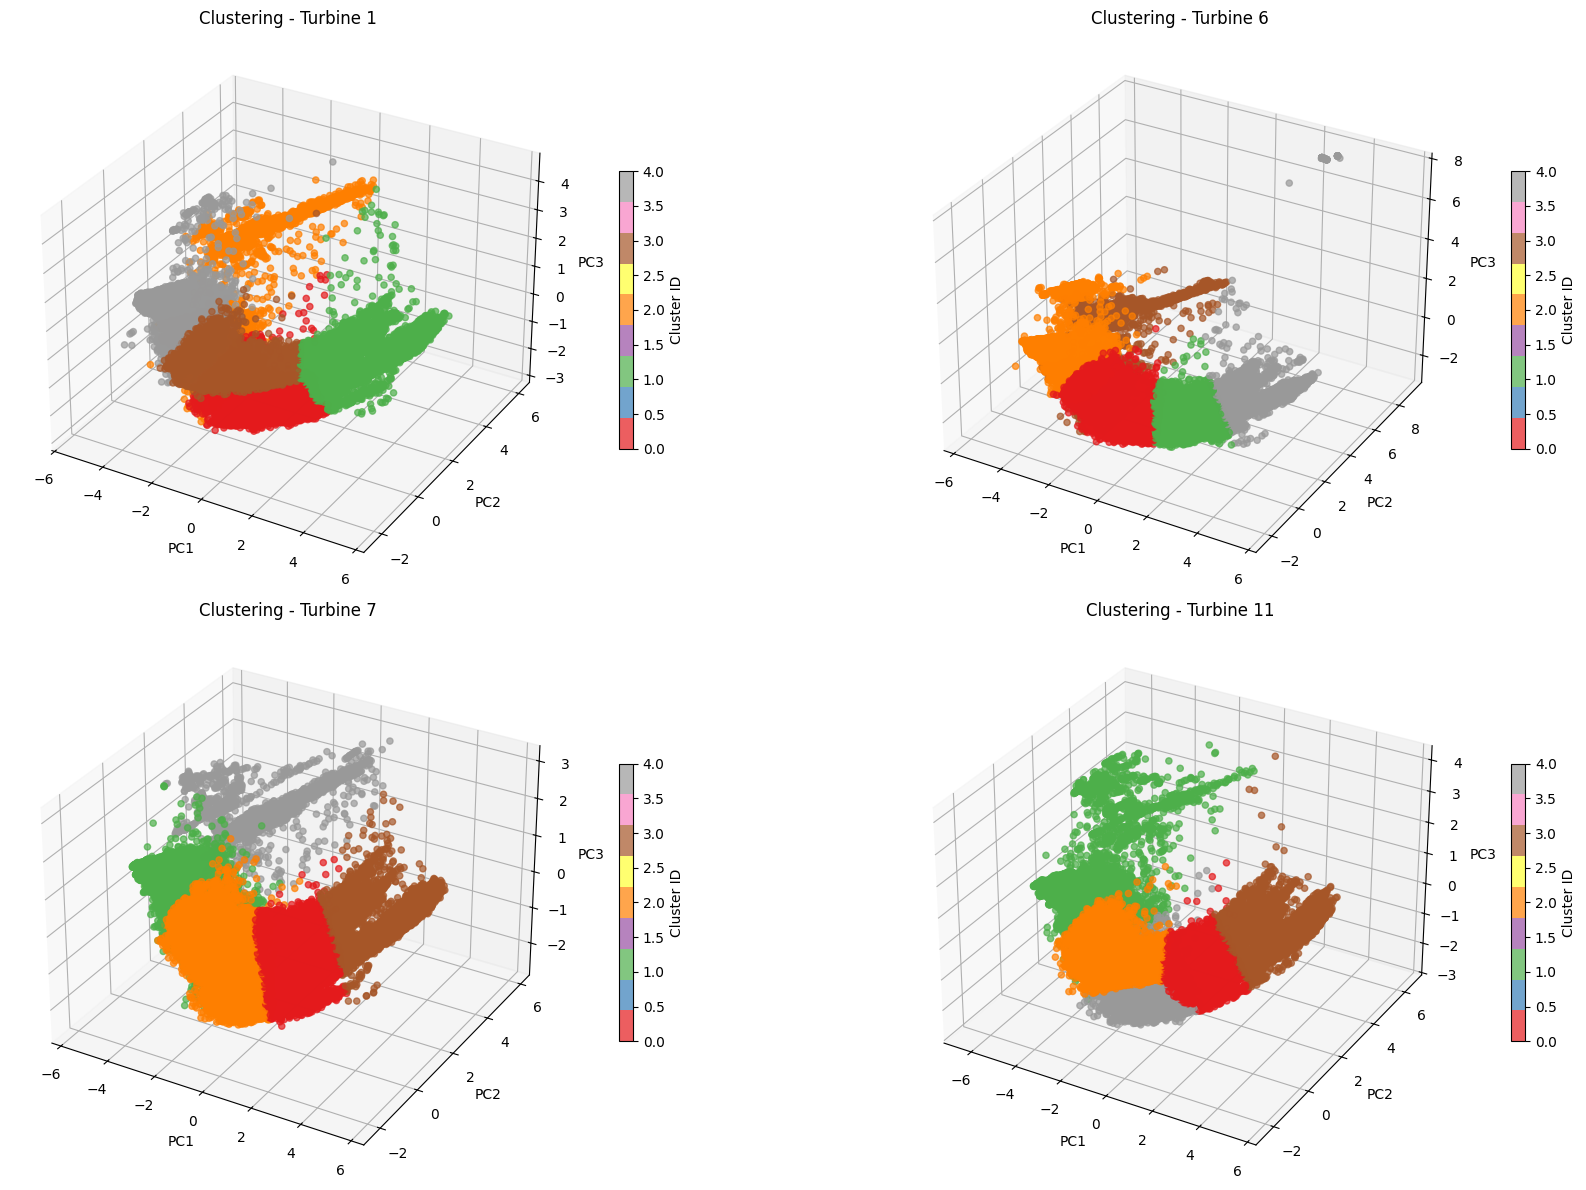

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define file paths for the 4 turbine datasets
file_paths = [
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T01)_TimeSequence.csv",  # Replace with actual file paths
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T06)_TimeSequence.csv",
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T07)_TimeSequence.csv",
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T11)_TimeSequence.csv"
]

# Define selected columns for PCA analysis
selected_columns = [
    'Gen_RPM_Avg', 'Gen_Bear_Temp_Avg', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Avg',
    'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_TotReactPwr', 'Gear_Bear_Temp_Avg',
    'Gen_Bear2_Temp_Avg', 'Nac_Direction_Avg', 'Blds_PitchAngle_Avg'
]

# Set up 3D subplots (2x2 layout)
fig = plt.figure(figsize=(20, 12))
titles = ["Turbine 1", "Turbine 6", "Turbine 7", "Turbine 11"]

# Loop through each file and process separately
for i, file_path in enumerate(file_paths):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')  # 2x2 subplot grid
    
    # Load turbine dataset
    df = pd.read_csv(file_path)

    # Keep only selected columns and ensure they exist
    df_selected = df[[col for col in selected_columns if col in df.columns]].select_dtypes(include=['number'])
    
    # Handle missing values (fill with column mean)
    df_selected = df_selected.fillna(df_selected.mean())

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_selected)

    # Apply PCA (Reduce to 3 components)
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(scaled_data)

    # Convert PCA result into a DataFrame
    pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"], index=df.index)

    # Apply K-Means Clustering
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Adjust clusters as needed
    pca_df["Cluster"] = kmeans.fit_predict(pca_df)

    # 3D Scatter Plot for Clusters
    scatter = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], 
                         c=pca_df["Cluster"], cmap="Set1", alpha=0.7)

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(f"Clustering - {titles[i]}")
    # Add color legend
    legend2 = plt.colorbar(scatter, ax=ax, shrink=0.5)
    legend2.set_label("Cluster ID")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define file paths for the 4 turbine datasets (replace with actual paths)
file_paths = [
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T01)_TimeSequence.csv",  # Replace with actual file paths
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T06)_TimeSequence.csv",
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T07)_TimeSequence.csv",
    "C:/Own use/Thesis/Wind_Turbine/Datasets/Scada_Data(Wind_Turbine)/Wind-Turbine-SCADA-signals-2016/Without_Grd_Column/Latest/Wind-Turbine-SCADA-signals(T11)_TimeSequence.csv"
]

turbine_names = ["Turbine 1", "Turbine 6", "Turbine 7", "Turbine 11"]

# Define selected columns for PCA analysis
selected_columns = [
    'Gen_RPM_Avg', 'Gen_Bear_Temp_Avg', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Avg',
    'Prod_LatestAvg_TotActPwr', 'Prod_LatestAvg_TotReactPwr', 'Gear_Bear_Temp_Avg',
    'Gen_Bear2_Temp_Avg', 'Nac_Direction_Avg', 'Blds_PitchAngle_Avg'
]

# Store results
cluster_distribution = []
cluster_centroids = []
cluster_variance = []

# Process each turbine dataset
for i, file_path in enumerate(file_paths):
    try:
        # Load dataset
        df = pd.read_csv(file_path)

        # Keep only selected columns and ensure they exist
        df_selected = df[[col for col in selected_columns if col in df.columns]].select_dtypes(include=['number'])

        # Handle missing values (fill with column mean)
        df_selected = df_selected.fillna(df_selected.mean())

        # Standardize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_selected)

        # Apply PCA (Reduce to 3 components)
        pca = PCA(n_components=3)
        pca_result = pca.fit_transform(scaled_data)

        # Convert PCA result into a DataFrame
        pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"], index=df.index)

        # Apply K-Means Clustering
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Adjust clusters as needed
        pca_df["Cluster"] = kmeans.fit_predict(pca_df)

        # Store cluster distribution
        cluster_counts = pca_df["Cluster"].value_counts().reset_index()
        cluster_counts.columns = ["Cluster", "Count"]
        cluster_counts["Turbine"] = turbine_names[i]  # Use turbine names correctly
        cluster_distribution.append(cluster_counts)

        # Store cluster centroids
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=["PC1", "PC2", "PC3"])
        centroids["Cluster"] = centroids.index
        centroids["Turbine"] = turbine_names[i]
        cluster_centroids.append(centroids)

        # Store cluster variance
        variance = pca_df.groupby("Cluster").var().reset_index()
        variance["Turbine"] = turbine_names[i]
        cluster_variance.append(variance)

    except Exception as e:
        print(f"Error processing {turbine_names[i]}: {e}")

# Combine results into tables
cluster_distribution_df = pd.concat(cluster_distribution, ignore_index=True)
cluster_centroids_df = pd.concat(cluster_centroids, ignore_index=True)
cluster_variance_df = pd.concat(cluster_variance, ignore_index=True)

# Display tables in console
print("\n **Cluster Distribution (Number of Data Points per Cluster)**")
print(cluster_distribution_df)

print("\n **Cluster Centroids (Mean PC1, PC2, PC3 for Each Cluster)**")
print(cluster_centroids_df)

print("\n **Cluster Variance (Spread of Data in Each Cluster)**")
print(cluster_variance_df)




📌 **Cluster Distribution (Number of Data Points per Cluster)**
    Cluster  Count     Turbine
0         0  44054   Turbine 1
1         1  33874   Turbine 1
2         2  26755   Turbine 1
3         0  43500   Turbine 6
4         1  32656   Turbine 6
5         2  26765   Turbine 6
6         0  44832   Turbine 7
7         1  32197   Turbine 7
8         2  27710   Turbine 7
9         2  45633  Turbine 11
10        0  32200  Turbine 11
11        1  26965  Turbine 11

📌 **Cluster Centroids (Mean PC1, PC2, PC3 for Each Cluster)**
         PC1       PC2       PC3  Cluster     Turbine
0   0.360387 -0.863079 -0.277332        0   Turbine 1
1  -3.204671  0.644178  0.212540        1   Turbine 1
2   3.472265  0.608387  0.188451        2   Turbine 1
3   0.302002 -0.867956 -0.165929        0   Turbine 6
4  -3.207544  0.645427  0.115860        1   Turbine 6
5   3.421881  0.623730  0.128423        2   Turbine 6
6   0.186747 -0.894550 -0.219866        0   Turbine 7
7  -3.206433  0.737361  0.186393      